In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data5 = pd.read_csv("World Happiness - 2015.csv")
# data5.head()
data5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [3]:
data9 = pd.read_csv("World Happiness - 2019.csv")
# data9.head()
data9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [23]:
data9.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [40]:
data9[data9['Country or region'] == 'Chile']

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
25,26,Chile,6.444,1.159,1.369,0.92,0.357,0.187,0.056


In [41]:
data5[data5['Country'] == 'Chile']

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
26,Chile,Latin America and Caribbean,27,6.67,0.058,1.10715,1.12447,0.85857,0.44132,0.12869,0.33363,2.67585


In [36]:
data5['Region'].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [39]:
for region in data5['Region'].unique():
    print(len(data5[data5['Region'] == region]), region)

21 Western Europe
2 North America
2 Australia and New Zealand
20 Middle East and Northern Africa
22 Latin America and Caribbean
9 Southeastern Asia
29 Central and Eastern Europe
6 Eastern Asia
40 Sub-Saharan Africa
7 Southern Asia


In [50]:
rows_list=[]
for region in data5['Region'].unique():
    happinessRankSum = data5.loc[data5['Region'] == region]['Happiness Rank'].sum()
    numCountriesInRegion = len(data5.loc[data5['Region'] == region])
    avgHappinessScorePerRegion = happinessRankSum/numCountriesInRegion;
    dict1 = {'Region': region, 'Av Happiness Rank': avgHappinessScorePerRegion, 'Countries In Region': numCountriesInRegion};
    rows_list.append(dict1)

In [52]:
df = pd.DataFrame(rows_list)
df.sort_values(['Av Happiness Rank'], ascending=True, inplace=True)
df

,Region,Av Happiness Rank,Countries In Region
2,Australia and New Zealand,9.500000,2
1,North America,10.000000,2
0,Western Europe,29.523810,21
4,Latin America and Caribbean,46.909091,22
7,Eastern Asia,64.500000,6
3,Middle East and Northern Africa,77.600000,20
6,Central and Eastern Europe,79.000000,29
5,Southeastern Asia,81.222222,9
9,Southern Asia,113.142857,7
8,Sub-Saharan Africa,127.900000,40


In [42]:
data6 = pd.read_csv("World Happiness - 2016.csv")

In [36]:
df2 = pd.merge(data5, data6,
                   on='Country', 
                   how='inner')

df2.rename(columns={'Happiness Score_x': 'Happiness Score 2015'}, inplace=True)
df2.rename(columns={'Happiness Score_y': 'Happiness Score 2016'}, inplace=True)

df2['Happiness Score Change'] = df2.apply(lambda x: x['Happiness Score 2016'] - x['Happiness Score 2015'], axis=1)
# df2

df3 = df2[['Country','Happiness Score Change']]
df3.sort_values('Happiness Score Change', axis=0, ascending=True, kind='mergesort')
df3

,Country,Happiness Score Change
0,Switzerland,-0.078
1,Iceland,-0.060
2,Denmark,-0.001
3,Norway,-0.024
4,Canada,-0.023
...,...,...
146,Rwanda,0.050
147,Benin,0.144
148,Syria,0.063
149,Burundi,0.000


C:\Users\Laura\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0.5, 'Happiness Score Change'),
 Text(0.5, 1.0, 'Change in Happiness Score 2015-2016')]

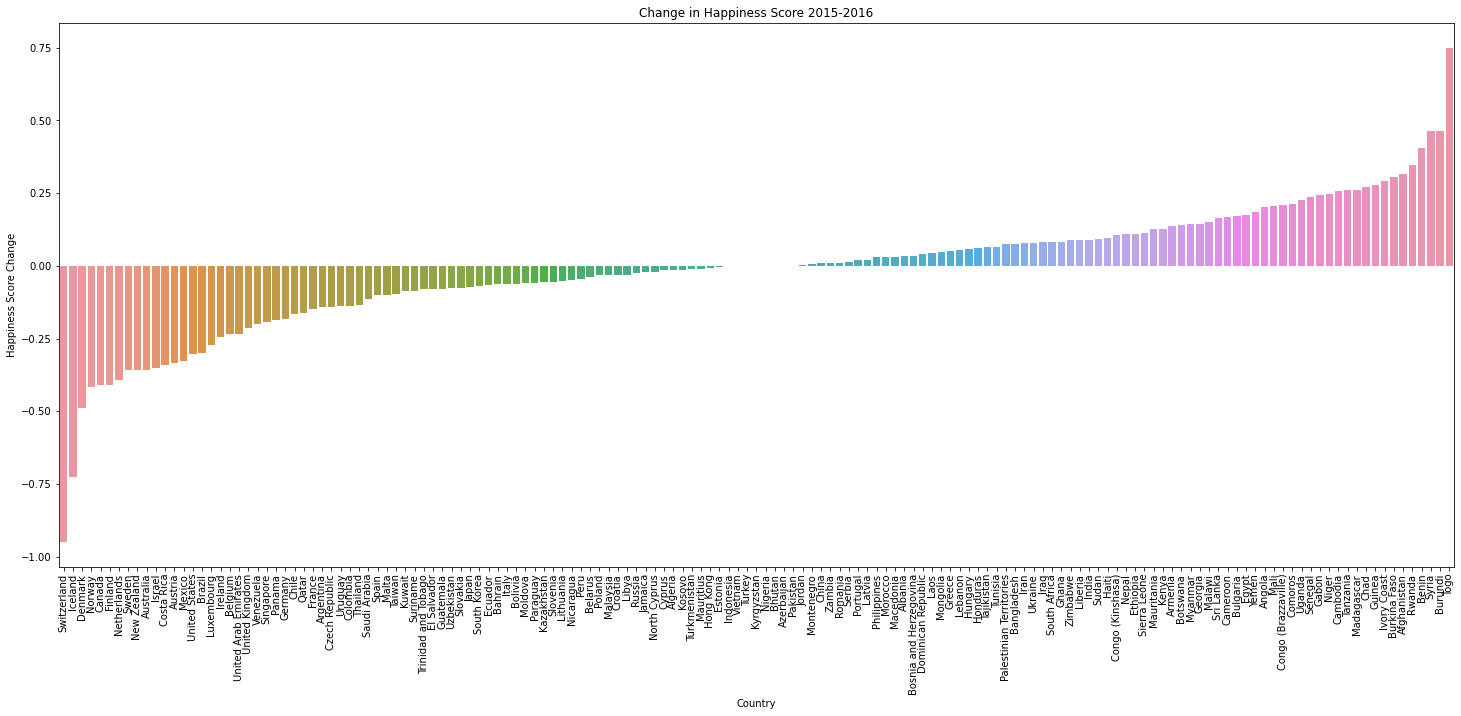

In [41]:
plt.figure(figsize=(25,10))
ax = sns.barplot(df3['Country'], sorted(df3['Happiness Score Change']))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set(ylabel='Happiness Score Change', title="Change in Happiness Score 2015-2016")
